# Crime data from 2015

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2015'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date            120009 non-null datetime64[ns]
Hour            120009 non-null int64
Offense Type    120009 non-null object
Beat            120009 non-null object
Premise         117881 non-null object
BlockRange      120009 non-null object
StreetName      120009 non-null object
Type            120009 non-null object
Suffix          120009 non-null object
# offenses      120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


In [7]:
df.head(2)

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Date               0
Hour               0
Offense Type       0
Beat               0
Premise         2128
BlockRange         0
StreetName         0
Type               0
Suffix             0
# offenses         0
dtype: int64

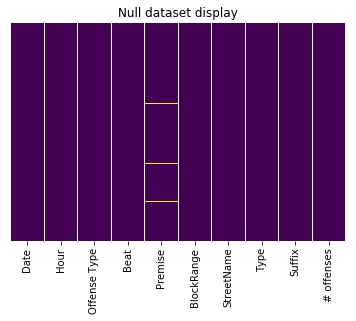

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- renaming

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,date,hour,offense type,beat,premise,blockrange,streetname,type,suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [12]:
df.rename(columns={
    '# offenses': 'num_offenses',
     'offense type': 'offense_type',
    'blockrange': 'block_range',
    'streetname': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
date            120009 non-null datetime64[ns]
hour            120009 non-null int64
offense_type    120009 non-null object
beat            120009 non-null object
premise         117881 non-null object
block_range     120009 non-null object
street_name     120009 non-null object
type            120009 non-null object
suffix          120009 non-null object
num_offenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


In [13]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,suffix,num_offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


## Drop columns

In [14]:
df.drop(['suffix','type'],axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 8 columns):
date            120009 non-null datetime64[ns]
hour            120009 non-null int64
offense_type    120009 non-null object
beat            120009 non-null object
premise         117881 non-null object
block_range     120009 non-null object
street_name     120009 non-null object
num_offenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.3+ MB


In [16]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,1


# Null values

In [17]:
df.apply(lambda x: sum(x.isnull()))

date               0
hour               0
offense_type       0
beat               0
premise         2128
block_range        0
street_name        0
num_offenses       0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
119414,2015-09-19,22,Theft,8C10,NaN,7100-7199,TIDWELL,1
119606,2015-09-16,8,Burglary,8C50,NaN,8700-8799,TIDWELL,1
119608,2015-09-03,13,Theft,8C50,NaN,9500-9599,MESA,1
119705,2015-09-01,12,Auto Theft,9C10,NaN,9000-9099,CLINTON,1
119708,2015-09-25,10,Theft,9C10,NaN,UNK,FLAGSHIP,1
119838,2014-09-30,4,Rape,9C40,NaN,13100-13199,EAST,1
119846,2015-09-24,5,Burglary,9C40,NaN,1200-1299,FEDERAL,1
119885,2015-09-18,16,Theft,9C40,NaN,12400-12499,EAST,1
119909,2015-09-18,21,Auto Theft,9C40,NaN,12600-12699,IH 10,1
119920,2015-09-10,20,Theft,9C40,NaN,12200-12299,EAST,1


### Drop rows with more than 3 null values

In [19]:
df.dropna(thresh=3,inplace=True)

In [20]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
119414,2015-09-19,22,Theft,8C10,NaN,7100-7199,TIDWELL,1
119606,2015-09-16,8,Burglary,8C50,NaN,8700-8799,TIDWELL,1
119608,2015-09-03,13,Theft,8C50,NaN,9500-9599,MESA,1
119705,2015-09-01,12,Auto Theft,9C10,NaN,9000-9099,CLINTON,1
119708,2015-09-25,10,Theft,9C10,NaN,UNK,FLAGSHIP,1
119838,2014-09-30,4,Rape,9C40,NaN,13100-13199,EAST,1
119846,2015-09-24,5,Burglary,9C40,NaN,1200-1299,FEDERAL,1
119885,2015-09-18,16,Theft,9C40,NaN,12400-12499,EAST,1
119909,2015-09-18,21,Auto Theft,9C40,NaN,12600-12699,IH 10,1
119920,2015-09-10,20,Theft,9C40,NaN,12200-12299,EAST,1


### Replace null values on premise_code to 'none'

In [21]:
df.premise.fillna('UNK',inplace=True)

In [22]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
premise         0
block_range     0
street_name     0
num_offenses    0
dtype: int64

# Inspect each column

## `num_offenses`

In [23]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,1
4,2015-04-01,19,Theft,10H10,UNK,UNK,SIDNEY,1


In [24]:
df.num_offenses.value_counts(dropna=False)

1     118206
2       1539
3        183
4         40
5         14
6         10
8          5
7          3
17         2
16         2
9          2
33         1
13         1
12         1
Name: num_offenses, dtype: int64

In [25]:
df.num_offenses.dtype

dtype('int64')

### Change the type from float to integer

In [26]:
df.num_offenses = df.num_offenses.astype('int')

In [27]:
df.num_offenses.dtype

dtype('int64')

In [28]:
df.num_offenses.value_counts(dropna=False)

1     118206
2       1539
3        183
4         40
5         14
6         10
8          5
7          3
17         2
16         2
9          2
33         1
13         1
12         1
Name: num_offenses, dtype: int64

## `beat`

In [29]:
len(df.beat.value_counts(dropna='False'))

119

In [30]:
df.beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I50', '23J50', '24C10', '24C20',
       '24C30', '24C40', '24C50', '24C60', '2A10', '2A20', '2A30', '2A40',
       '2A50', '2A60', '3B10', '3B30', '3B40', '3B50', '4F10', '4F20',
       '4F30', '5F10', '5F20', '5F30', '5F40', '6B10', '6B20', '6B30',
       '6B40', '6B50', '6B60', '7C10', '7C20', '7C30', '7C40', '7C50',
       '

In [31]:
df.beat = df.beat.str.strip()

In [32]:
len(df.beat.unique())

119

## `block_range`

In [33]:
len(df.block_range.unique())

245

In [34]:
df.block_range = df.block_range.str.strip()

In [35]:
len(df.block_range.unique())

245

## `date`

In [36]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [37]:
df.hour.value_counts(dropna=False)

15    7474
14    7352
16    7325
12    7061
11    7032
10    7025
13    6950
9     6790
17    6680
8     6151
18    5998
19    5571
20    5300
7     4825
21    4547
22    4326
23    3749
6     3064
0     2889
1     2434
2     2216
5     1831
3     1796
4     1623
Name: hour, dtype: int64

In [38]:
df.hour.dtype

dtype('int64')

## Change dtype 

In [39]:
df.hour = df.hour.astype('int')

In [40]:
df.hour.dtype

dtype('int64')

In [41]:
df.hour.value_counts(dropna=False)

15    7474
14    7352
16    7325
12    7061
11    7032
10    7025
13    6950
9     6790
17    6680
8     6151
18    5998
19    5571
20    5300
7     4825
21    4547
22    4326
23    3749
6     3064
0     2889
1     2434
2     2216
5     1831
3     1796
4     1623
Name: hour, dtype: int64

## `offense_type`

In [42]:
df.offense_type.value_counts(dropna=False)

Theft                 66309
Burglary              19824
Auto Theft            13113
Robbery               10274
Aggravated Assault     9209
Rape                    985
Murder                  287
1                         8
Name: offense_type, dtype: int64

In [43]:
df.offense_type.unique()

array(['Theft', 'Burglary', 'Rape', 'Murder', 'Auto Theft',
       'Aggravated Assault', 'Robbery', 1], dtype=object)

## `street_name`

In [44]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
premise         0
block_range     0
street_name     0
num_offenses    0
dtype: int64

In [45]:
len(df.street_name.value_counts(dropna=False))

7918

In [46]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER     3623
GULF           2138
SAM HOUSTON    1718
NORTH          1701
LOOP           1573
GESSNER        1567
RICHMOND       1432
KATY           1378
SOUTHWEST      1365
MAIN           1135
Name: street_name, dtype: int64

In [47]:
df.street_name.unique()

array(['CANAL', 'YORK', 'ENNIS', ..., 'LINBROOK', 'TEXAS LAUREL',
       'KIRKSTALL'], dtype=object)

In [49]:
df.street_name = df.street_name.str.strip()

In [50]:
df.apply(lambda x: sum(x.isnull()))

date             0
hour             0
offense_type     0
beat             0
premise          0
block_range      0
street_name     28
num_offenses     0
dtype: int64

In [51]:
len(df.street_name.value_counts(dropna=False))

7913

In [52]:
df.street_name = df.street_name.str.upper()

In [53]:
len(df.street_name.value_counts(dropna=False))

7913

In [54]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
92898,2015-11-16,11,Theft,15E40,Miscellaneous Business (Non-Specific),UNK,NaN,1
96913,2015-11-20,13,Theft,2A30,Commercial Parking Lot or Garage,UNK,NaN,1
97005,2015-11-03,3,Robbery,2A30,"Road, Street, or Sidewalk",UNK,NaN,1
97538,2015-11-18,14,Aggravated Assault,3B40,"Road, Street, or Sidewalk",UNK,NaN,2
97581,2015-11-26,23,Aggravated Assault,3B40,High Rise,UNK,NaN,1
102232,2015-10-15,11,Theft,14D20,Miscellaneous Business (Non-Specific),UNK,NaN,1
107028,2015-10-16,12,Aggravated Assault,2A30,Residence or House,UNK,NaN,1
107600,2015-10-05,13,Theft,3B40,Residence or House,UNK,NaN,1
116764,2015-09-22,15,Theft,2A30,"Road, Street, or Sidewalk",UNK,NaN,1
117410,2015-09-28,14,Aggravated Assault,3B40,Residence or House,UNK,NaN,1


## Drop null street name

In [55]:
df.dropna(subset=['street_name'],inplace=True)

In [56]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
premise         0
block_range     0
street_name     0
num_offenses    0
dtype: int64

## Organiaze columns

In [57]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,1
4,2015-04-01,19,Theft,10H10,UNK,UNK,SIDNEY,1


In [58]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses']

In [59]:
df = df.reindex(columns=cols)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119981 entries, 0 to 120008
Data columns (total 8 columns):
date            119981 non-null datetime64[ns]
hour            119981 non-null int64
beat            119981 non-null object
offense_type    119981 non-null object
block_range     119981 non-null object
street_name     119981 non-null object
premise         119981 non-null object
num_offenses    119981 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.2+ MB


In [61]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
0,2015-02-26,12,10H10,Theft,4900-4999,CANAL,"Road, Street, or Sidewalk",1
1,2015-04-05,16,10H10,Burglary,100-199,YORK,Residence or House,1
2,2015-04-06,20,10H10,Rape,UNK,CANAL,Residence or House,1
3,2015-04-16,8,10H10,Theft,400-499,ENNIS,Construction Site,1
4,2015-04-01,19,10H10,Theft,UNK,SIDNEY,UNK,1


In [62]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    0
block_range     0
street_name     0
premise         0
num_offenses    0
dtype: int64

In [63]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses


## Save clean data

In [64]:
data_directory_saves

'../data/clean_data/'

In [65]:
df.to_csv(data_directory_saves+'crime_2015.csv')

offense_type as wrong value that neets to  be changed